# Vaja 3 - Predmet Vitko upravljanje v inženistvu

In [1]:
import pandas as pd

DATA_PATH = "Izdelava3DPrototipa_Baza_SKUPINE.xlsx"
df = pd.read_excel(DATA_PATH)
df = df[~(df['Korak'].isna() | (df['Korak'].astype(str).str.strip() == ''))].copy()

# Convert columns to numeric
for c in ["Trajanje_h", "Čakanje_h", "Napake"]:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# Total time per step
df["Skupni_čas_h"] = df["Trajanje_h"] + df["Čakanje_h"]


## 1. Porazdelitev časa po korakih (Trajanje + Čakanje)

Namen je ugotoviti, kateri koraki trajajo najdlje in kje se kopiči največ časa v celotnem poteku dela.

Pri izračunu je upoštevan tako čas izvajanja posameznih aktivnosti kot tudi čas čakanja, ki nastaja med njimi.

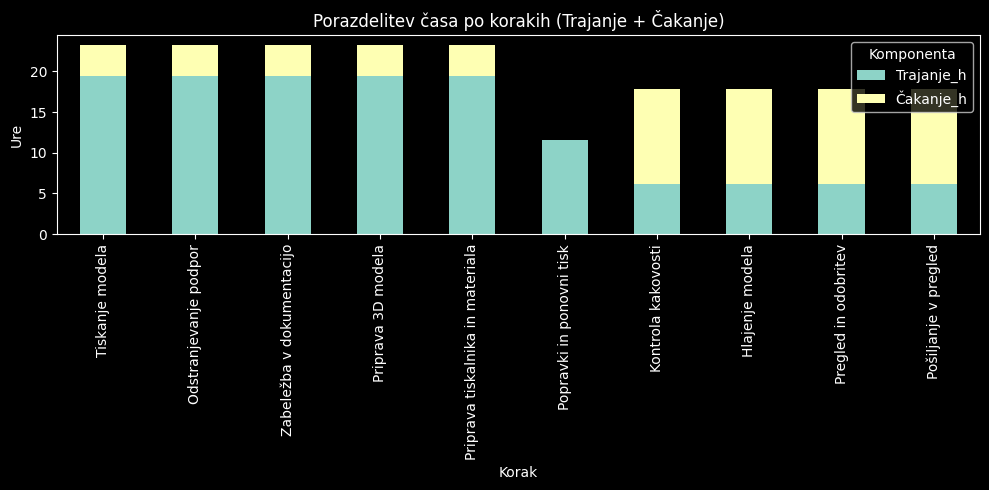

Največ časa se porabi pri: Tiskanje modela, Odstranjevanje podpor, Zabeležba v dokumentacijo. Skupni čas teh treh korakov je 69.75 h.
Graf pokaže, kje se kopiči večina časa in kako velik delež predstavljata izvajanje in čakanje.

Ti koraki so ključni kandidati za optimizacijo procesa, saj lahko zmanjšanje njihovega trajanja ali čakanja pomembno vpliva na celoten čas izvedbe. 


In [2]:
grp = df.groupby('Korak')[['Trajanje_h','Čakanje_h']].sum().sort_values('Trajanje_h', ascending=False)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
grp.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porazdelitev časa po korakih (Trajanje + Čakanje)')
ax.set_xlabel('Korak')
ax.set_ylabel('Ure')
ax.legend(title='Komponenta')
plt.tight_layout()
plt.show()

top = grp.sum(axis=1).sort_values(ascending=False).head(3)
print(f"Največ časa se porabi pri: {', '.join(top.index)}. Skupni čas teh treh korakov je {top.sum():.2f} h.")
print("Graf pokaže, kje se kopiči večina časa in kako velik delež predstavljata izvajanje in čakanje.")
print("\nTi koraki so ključni kandidati za optimizacijo procesa, saj lahko zmanjšanje njihovega trajanja ali čakanja pomembno vpliva na celoten čas izvedbe. ")
# fig.savefig("01_porazdelitev_koraki.png", dpi=150)


## 2. Delež aktivnosti, ki dodajajo vrednost (VA) v primerjavi z NVA in NNVA

**VA (Value Added)** – aktivnosti z dodano vrednostjo: to so aktivnosti, ki neposredno prispevajo k ustvarjanju končnega izdelka ali storitve.

**NVA (Non-Value Added)** – aktivnosti brez dodane vrednosti: To so aktivnosti, ki ne prispevajo neposredno k vrednosti izdelka, vendar so trenutno nujne, ker omogočajo izvedbo procesa

**NNVA (Necessary Non-Value Added)** – potrebne, a ne-vrednostne aktivnosti: To so aktivnosti, ki ne ustvarjajo vrednosti in tudi niso nujno potrebne, zato predstavljajo čisto izgubo (waste) v procesu.

Namen je ugotoviti, kolikšen del procesa dejansko ustvarja dodano vrednost za končni izdelek, ter prepoznati dele, kjer se pojavljajo izgube ali nepotrebne aktivnosti.

S primerjavo deležev VA, NVA in NNVA je mogoče oceniti učinkovitost celotnega procesa in določiti potencialne možnosti za izboljšave.
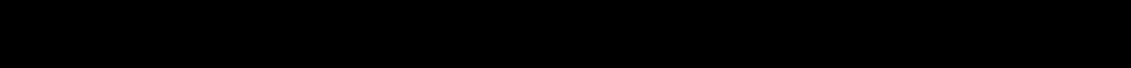
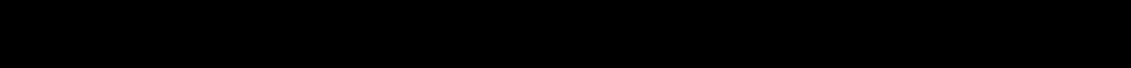
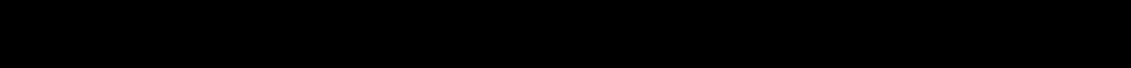

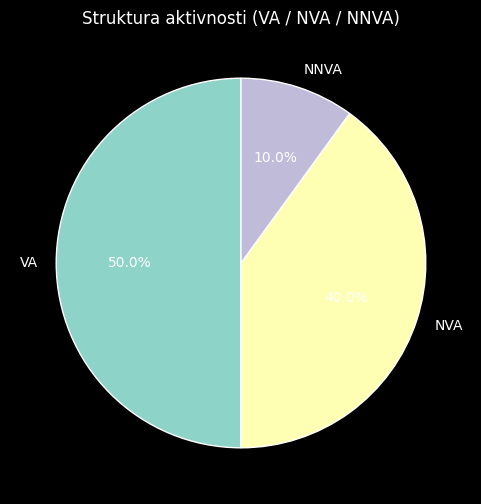

Tortni prikaz prikazuje razmerje med aktivnostmi, ki dodajajo vrednost (VA), in tistimi, ki ne dodajajo (NVA, NNVA).
Višji delež VA pomeni, da večji del procesa neposredno prispeva k končnemu rezultatu, medtem ko NVA/NNVA predstavljajo priložnost za optimizacijo.
Cilj je povečati delež VA z zmanjšanjem ali odpravo NVA in NNVA aktivnosti, kar lahko vodi do krajšega časa izvedbe in večje učinkovitosti.


In [3]:
counts = df['Tip_aktivnosti'].value_counts()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
ax.set_title('Struktura aktivnosti (VA / NVA / NNVA)')
plt.show()

print("Tortni prikaz prikazuje razmerje med aktivnostmi, ki dodajajo vrednost (VA), "
      "in tistimi, ki ne dodajajo (NVA, NNVA).")
print("Višji delež VA pomeni, da večji del procesa neposredno prispeva k končnemu rezultatu, "
      "medtem ko NVA/NNVA predstavljajo priložnost za optimizacijo.")
print("Cilj je povečati delež VA z zmanjšanjem ali odpravo NVA in NNVA aktivnosti, kar lahko vodi do krajšega časa izvedbe in večje učinkovitosti.")
# fig.savefig("02_delez_VA_NVA_NNVA.png", dpi=150)


## 3. Analiza čakanja (waiting time)

Namen te analize je preučiti, kje v procesu se pojavljajo največji zastoji in čakalni časi.

Čas čakanja predstavlja obdobje, ko se delo ne izvaja aktivno, ampak proces stoji – na primer zaradi čakanja na odobritev, razpoložljivost opreme ali rezultat preverjanja kakovosti.

S primerjavo skupnega in povprečnega časa čakanja po posameznih korakih in vlogah je mogoče ugotoviti, kateri deli procesa so najbolj neproduktivni in kje so glavne priložnosti za optimizacijo pretoka dela.

## Skupni čas čakanja po korakih

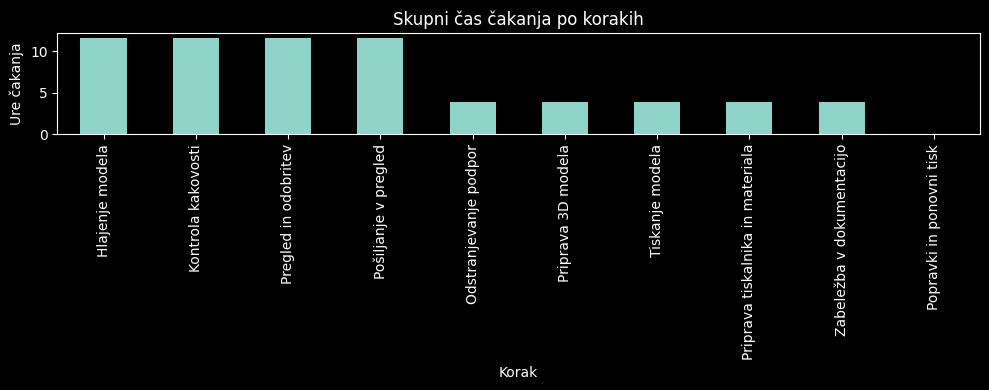

Največ čakanja se nabere pri: Hlajenje modela, Kontrola kakovosti, Pregled in odobritev (skupaj 34.83 h za top 3).
Ti koraki so glavni kandidati za optimizacijo (boljše planiranje, avtomatizacija odobritev, paralelizacija).


In [4]:
wait_sum_korak = df.groupby('Korak')['Čakanje_h'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))
wait_sum_korak.plot(kind='bar', ax=ax)
ax.set_title('Skupni čas čakanja po korakih')
ax.set_xlabel('Korak')
ax.set_ylabel('Ure čakanja')
plt.tight_layout()
plt.show()

naj = wait_sum_korak.head(3)
print(f"Največ čakanja se nabere pri: {', '.join(naj.index)} (skupaj {naj.sum():.2f} h za top 3).")
print("Ti koraki so glavni kandidati za optimizacijo (boljše planiranje, avtomatizacija odobritev, paralelizacija).")
# fig.savefig("03a_cakanje_po_korakih.png", dpi=150)


## Povprečni čas čakanja po vlogah

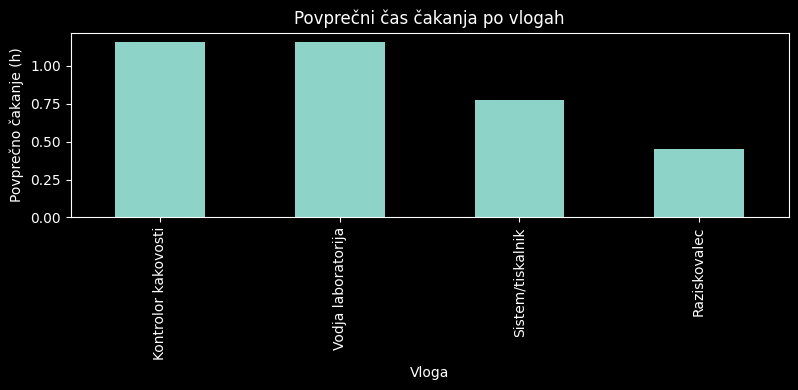

Največ povprečnega čakanja ima vloga: Kontrolor kakovosti (≈ 1.16 h na korak).
Neuravnotežena porazdelitev čakanja nakazuje ozka grla in morebitno potrebo po prerazporeditvi nalog ali virov.


In [5]:
wait_avg_vloga = df.groupby('Vloga (kdo)')['Čakanje_h'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,4))
wait_avg_vloga.plot(kind='bar', ax=ax)
ax.set_title('Povprečni čas čakanja po vlogah')
ax.set_xlabel('Vloga')
ax.set_ylabel('Povprečno čakanje (h)')
plt.tight_layout()
plt.show()

top_role = wait_avg_vloga.index[0]
print(f"Največ povprečnega čakanja ima vloga: {top_role} (≈ {wait_avg_vloga.iloc[0]:.2f} h na korak).")
print("Neuravnotežena porazdelitev čakanja nakazuje ozka grla in morebitno potrebo po prerazporeditvi nalog ali virov.")
# fig.savefig("03b_cakanje_po_vlogah.png", dpi=150)


## 4. napake in ponovitve (rework)

Namen te analize je ugotoviti, v katerih korakih procesa se pojavlja največ napak in ponovitev postopkov ter preveriti, ali obstaja povezava med trajanjem posameznega koraka in pogostostjo napak.

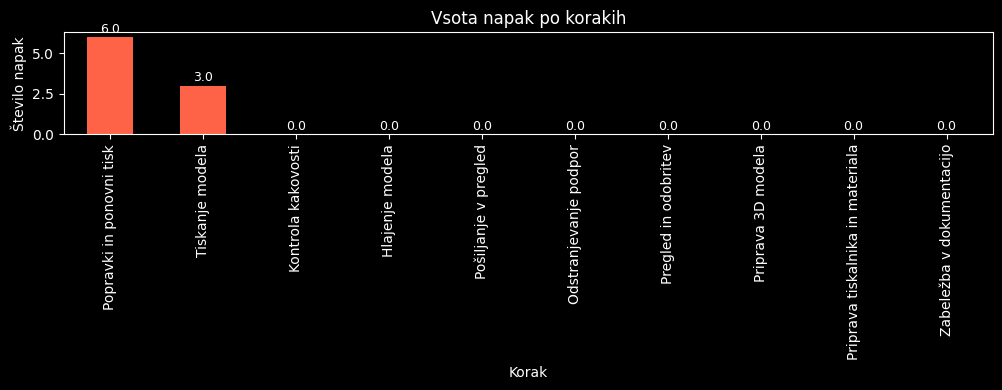

Največ napak se pojavlja pri: Popravki in ponovni tisk, Tiskanje modela. Skupaj imajo 9.0 napak.
Ti koraki zahtevajo podrobnejši nadzor kakovosti ali izboljšave postopkov (npr. kalibracija, preverjanje vhodnih podatkov). 



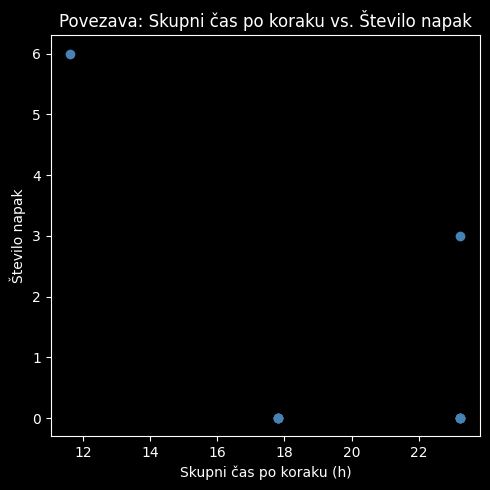

Pearson r = -0.55 (p = 0.100).
Ni statistično značilne povezave med dolžino trajanja in številom napak. To pomeni, da so napake verjetno posledica drugih dejavnikov, kot so človeški faktor ali kakovost vhodnih podatkov.


In [6]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Errors by step
err_by_step = df.groupby('Korak')['Napake'].sum().sort_values(ascending=False)

#print(err_by_step.describe())

fig, ax = plt.subplots(figsize=(10,4))
bars = err_by_step.plot(kind='bar', ax=ax, color='tomato')
ax.set_title('Vsota napak po korakih')
ax.set_xlabel('Korak')
ax.set_ylabel('Število napak')

# how many errors labels
for i, v in enumerate(err_by_step.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

top_err = err_by_step.head(2)
print(f"Največ napak se pojavlja pri: {', '.join(top_err.index)}. "
      f"Skupaj imajo {top_err.sum()} napak.")
print("Ti koraki zahtevajo podrobnejši nadzor kakovosti ali izboljšave postopkov (npr. kalibracija, preverjanje vhodnih podatkov). \n")

# Connection between time and errors (korelacija)
time_by_step = df.groupby('Korak')['Skupni_čas_h'].sum()
common = err_by_step.index.intersection(time_by_step.index)

# calculate korelacija (Pearsonov koeficient)
r, p = pearsonr(time_by_step[common].values, err_by_step[common].values)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(time_by_step[common].values, err_by_step[common].values, color='steelblue')
ax.set_title('Povezava: Skupni čas po koraku vs. Število napak')
ax.set_xlabel('Skupni čas po koraku (h)')
ax.set_ylabel('Število napak')
plt.tight_layout()
plt.show()

print(f"Pearson r = {r:.2f} (p = {p:.3f}).")
if p < 0.05 and r > 0:
    print("Med dolžino trajanja in številom napak obstaja pozitivna in statistično značilna povezava. "
          "To pomeni, da daljši koraki pogosto povzročajo več napak, kar lahko nakazuje na kompleksnost postopkov "
          "ali preobremenjenost določenih faz.")
elif p < 0.05 and r < 0:
    print("Med dolžino trajanja in številom napak obstaja negativna korelacija, kar pomeni, da daljši koraki "
          "pogosto povzročajo manj napak. To lahko nakazuje, da so daljše faze bolje nadzorovane ali standardizirane.")
else:
    print("Ni statistično značilne povezave med dolžino trajanja in številom napak. "
          "To pomeni, da so napake verjetno posledica drugih dejavnikov, kot so "
          "človeški faktor ali kakovost vhodnih podatkov.")
# fig.savefig("04a_napake_po_korakih.png", dpi=150)
# fig.savefig("04b_korelacija_cas_vs_napake.png", dpi=150)


## 5. Skupni čas procesa po iteracijah

Namen te analize je prikazati, kako se skupni čas celotnega procesa spreminja skozi zaporedne ponovitve (iteracije).

S tem lahko opazujemo, ali se zaradi učenja, standardizacije postopkov ali uvedbe Kaizen izboljšav čas postopno zmanjšuje.

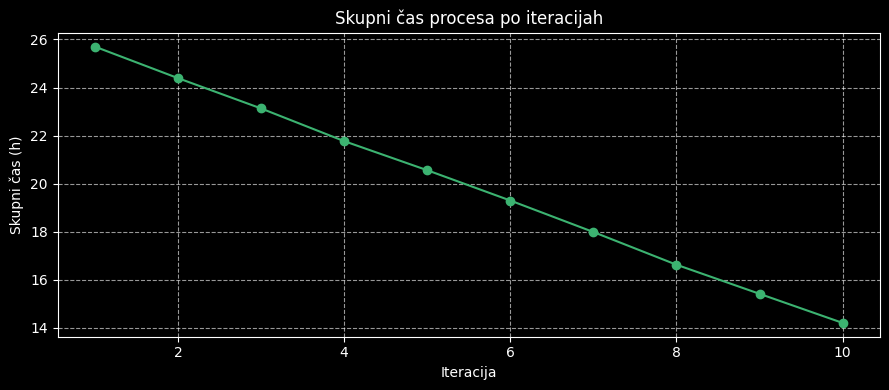

Skupni čas procesa se skozi iteracije zmanjšuje za približno 44.7 % (iz 25.7 h na 14.2 h).
To kaže na učinek učenja in postopno standardizacijo postopkov, kjer se časi in napake zmanjšujejo.


In [7]:
total_by_iter = df.groupby('Iteracija')['Skupni_čas_h'].sum()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,4))
total_by_iter.plot(kind='line', marker='o', color='mediumseagreen', ax=ax)
ax.set_title('Skupni čas procesa po iteracijah')
ax.set_xlabel('Iteracija')
ax.set_ylabel('Skupni čas (h)')
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

start_val = total_by_iter.iloc[0]
end_val = total_by_iter.iloc[-1]
change = ((end_val - start_val) / start_val) * 100
trend = "zmanjšuje" if change < 0 else "povečuje"
print(f"Skupni čas procesa se skozi iteracije {trend} za približno {abs(change):.1f} % "
      f"(iz {start_val:.1f} h na {end_val:.1f} h).")
print("To kaže na učinek učenja in postopno standardizacijo postopkov, kjer se časi in napake zmanjšujejo.")
# fig.savefig("05_skupni_cas_po_iteracijah.png", dpi=150)


## 6. Primerjava med vlogami

Namen te analize je primerjati porazdelitev časa izvajanja in čakanja med posameznimi vlogami v procesu.

S tem želimo ugotoviti, ali so obremenitve med udeleženci uravnotežene ali pa se določene vloge soočajo z večjim deležem čakanja in s tem predstavljajo ozka grla v procesu.

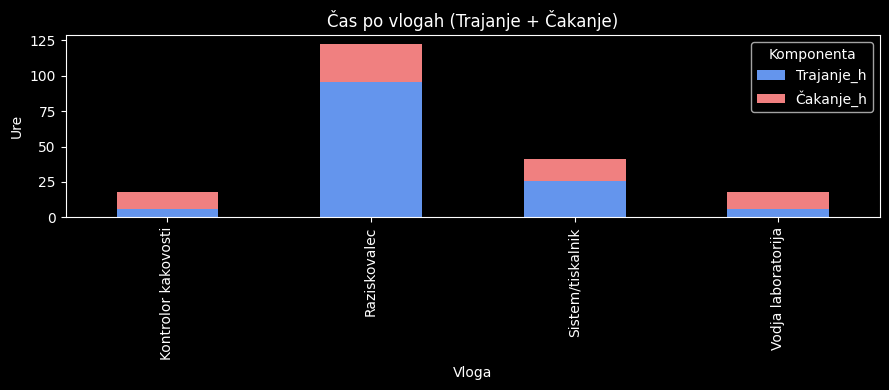

Največ časa v procesu zavzema vloga: Raziskovalec (122.4 h skupaj).
Graf pokaže porazdelitev dela in čakanja po vlogah. Če ima ena vloga več čakanja, to nakazuje ozko grlo ali neučinkovito razporeditev nalog.


In [8]:
role_time = df.groupby('Vloga (kdo)')[['Trajanje_h','Čakanje_h']].sum()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,4))
role_time.plot(kind='bar', stacked=True, ax=ax, color=['cornflowerblue', 'lightcoral'])
ax.set_title('Čas po vlogah (Trajanje + Čakanje)')
ax.set_xlabel('Vloga')
ax.set_ylabel('Ure')
ax.legend(title='Komponenta')
plt.tight_layout()
plt.show()

top_role = role_time.sum(axis=1).sort_values(ascending=False).index[0]
total_time = role_time.sum(axis=1).max()
print(f"Največ časa v procesu zavzema vloga: {top_role} ({total_time:.1f} h skupaj).")
print("Graf pokaže porazdelitev dela in čakanja po vlogah. Če ima ena vloga več čakanja, to nakazuje ozko grlo "
      "ali neučinkovito razporeditev nalog.")
# fig.savefig("06_cas_po_vlogah.png", dpi=150)


## 7.Skupna učinkovitost procesa (VA vs NVA/NNVA)

Namen te analize je oceniti učinkovitost celotnega procesa glede na delež časa, porabljenega za aktivnosti z dodano vrednostjo (VA), v primerjavi z aktivnostmi brez dodane vrednosti (NVA in NNVA).

S tem želimo prikazati, kako se skupni “Lead Time” porazdeli med koristne in nekoristne aktivnosti ter oceniti potencialni prihranek časa, če bi se del aktivnosti brez dodane vrednosti odpravil.

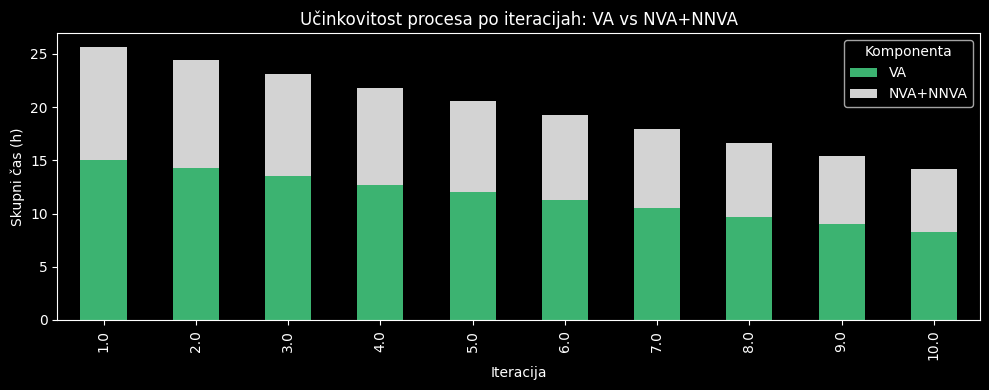

Povprečni delež aktivnosti z dodano vrednostjo (VA) znaša približno 58.4 %.
Višji delež VA pomeni večjo učinkovitost procesa. Zmanjšanje NVA/NNVA (npr. odprava čakanja, avtomatizacija) bi lahko dodatno skrajšalo skupni čas izvedbe.
Iz prikaza je jasno razviden trend zmanjševanja skupnega časa skozi ponovitve procesa, kar kaže na učinek učenja in postopno izboljševanje učinkovitosti.


In [9]:
va = df[df['Tip_aktivnosti'] == 'VA'].groupby('Iteracija')['Skupni_čas_h'].sum()
nonva = df[df['Tip_aktivnosti'] != 'VA'].groupby('Iteracija')['Skupni_čas_h'].sum()

plot_df = pd.DataFrame({'VA': va, 'NVA+NNVA': nonva})

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))
plot_df.plot(kind='bar', stacked=True, ax=ax, color=['mediumseagreen', 'lightgray'])
ax.set_title('Učinkovitost procesa po iteracijah: VA vs NVA+NNVA')
ax.set_xlabel('Iteracija')
ax.set_ylabel('Skupni čas (h)')
ax.legend(title='Komponenta')
plt.tight_layout()
plt.show()

avg_va_share = (plot_df['VA'] / plot_df.sum(axis=1)).mean() * 100
print(f"Povprečni delež aktivnosti z dodano vrednostjo (VA) znaša približno {avg_va_share:.1f} %.")
print("Višji delež VA pomeni večjo učinkovitost procesa. Zmanjšanje NVA/NNVA (npr. odprava čakanja, avtomatizacija) "
      "bi lahko dodatno skrajšalo skupni čas izvedbe.")
print("Iz prikaza je jasno razviden trend zmanjševanja skupnega časa skozi ponovitve procesa, kar kaže na učinek učenja in postopno izboljševanje učinkovitosti.")
# fig.savefig("07_ucinkovitost_VA_vs_NVA.png", dpi=150)


## C1 preverjanje porazdelitve glavnih numeričnih spremenljivk

Namen tega dela je statistično analizirati glavne spremenljivke procesa – trajanje, čakanje in napake – ter ugotoviti njihovo porazdelitev in osnovne opisne značilnosti.

S tem želimo preveriti, ali imajo podatki normalno porazdelitev in kakšna je razlika med aktivnostmi z dodano in brez dodane vrednosti.

Graf HISTOGRAM prikazujejo porazdelitev podatkov
Grafi BOXPLOT prikazujejo razpršenost in morebitne odstopanja v podatkih.

Spremenljivka: Trajanje_h


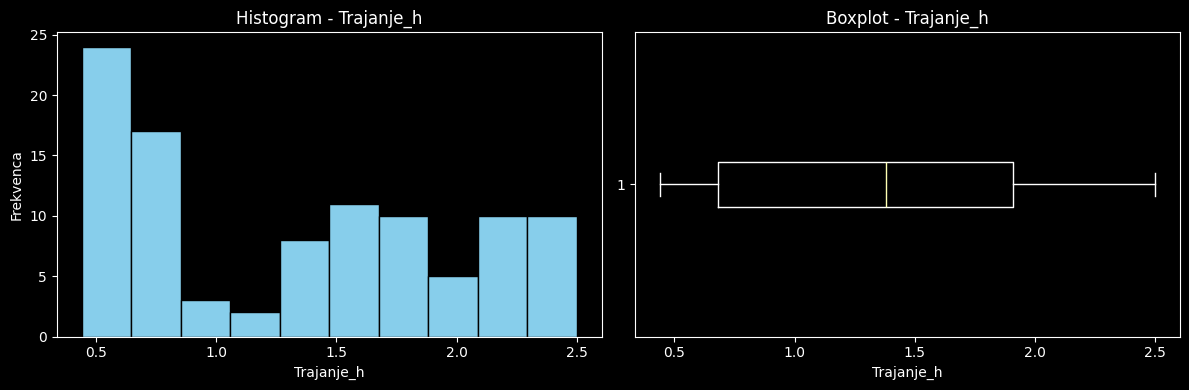

Shapiro–Wilk test: W = 0.901, p = 0.0000
Porazdelitev NI normalna (p < 0.05)

Histogram kaže asimetrično porazdelitev večina vrednosti je med 0.5– 1.0h
Boxplot potrjuje, da se večina trajanj giblje okoli mediane ~1.5 h,

Spremenljivka: Čakanje_h


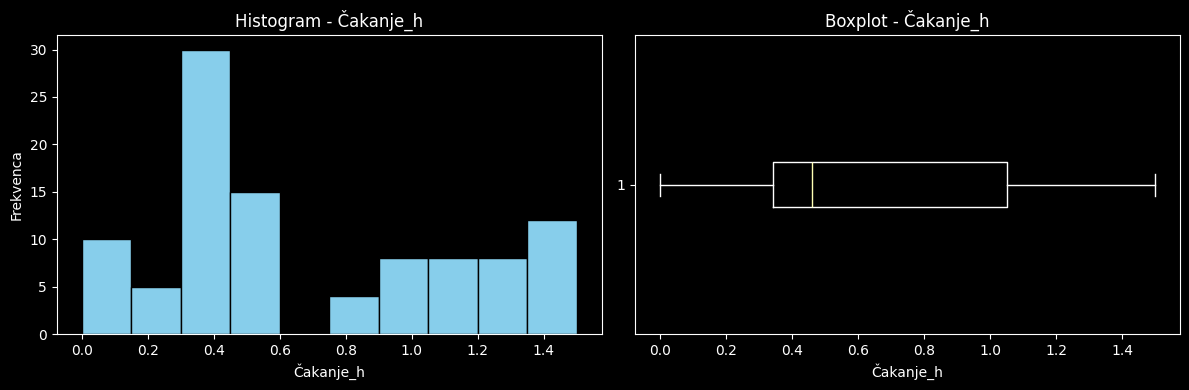

Shapiro–Wilk test: W = 0.900, p = 0.0000
Porazdelitev NI normalna (p < 0.05)

Histogram ima izrazit vrh pri kratkih časih (0.2–0.6 h), kar pomeni, da se večina čakanja zgodi v kratkih intervalih.
Boxplot kaže, da se mediana čakanja giblje okoli 0.5 h

Spremenljivka: Napake


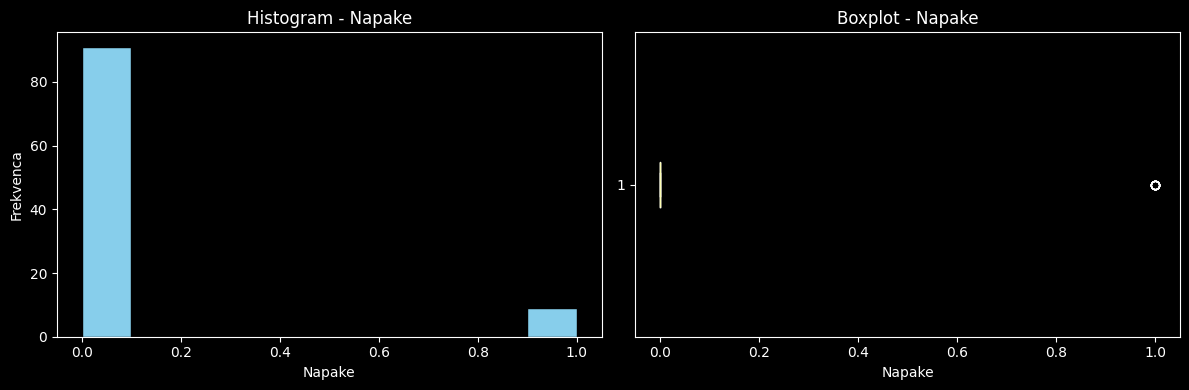

Shapiro–Wilk test: W = 0.322, p = 0.0000
Porazdelitev NI normalna (p < 0.05)

Histogram prikazuje močno skoncentrirano vrednost pri 0, kar pomeni, da večina korakov poteka brez napak.
Le majhen delež korakov ima napake (vrednost = 1), kar se vidi tudi kot outlier v boxplotu.
Shapiro–Wilk test (p = 0.0000) → porazdelitev ni normalna, ker so napake redke in diskretne.


In [10]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt

numeric_vars = ['Trajanje_h', 'Čakanje_h', 'Napake']

print("Graf HISTOGRAM prikazujejo porazdelitev podatkov")
print("Grafi BOXPLOT prikazujejo razpršenost in morebitne odstopanja v podatkih.")

for var in numeric_vars:
    print(f"\nSpremenljivka: {var}")
    # histogram
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.hist(df[var], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram - {var}')
    plt.xlabel(var); plt.ylabel('Frekvenca')

    # boxplot
    plt.subplot(1,2,2)
    plt.boxplot(df[var], vert=False)
    plt.title(f'Boxplot - {var}')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

    # Shapiro–Wilk test check for normality
    stat, p = shapiro(df[var])
    print(f"Shapiro–Wilk test: W = {stat:.3f}, p = {p:.4f}")
    if p >= 0.05:
        print("Porazdelitev je približno normalna (p ≥ 0.05)")
    else:
        print("Porazdelitev NI normalna (p < 0.05)")

    if (var == 'Trajanje_h'):
         print("\nHistogram kaže asimetrično porazdelitev večina vrednosti je med 0.5– 1.0h")
         print("Boxplot potrjuje, da se večina trajanj giblje okoli mediane ~1.5 h,")
    if (var == 'Čakanje_h'):
         print("\nHistogram ima izrazit vrh pri kratkih časih (0.2–0.6 h), kar pomeni, da se večina čakanja zgodi v kratkih intervalih.")
         print("Boxplot kaže, da se mediana čakanja giblje okoli 0.5 h")
    if (var == 'Napake'):
        print("\nHistogram prikazuje močno skoncentrirano vrednost pri 0, kar pomeni, da večina korakov poteka brez napak.")
        print("Le majhen delež korakov ima napake (vrednost = 1), kar se vidi tudi kot outlier v boxplotu.")
        print("Shapiro–Wilk test (p = 0.0000) → porazdelitev ni normalna, ker so napake redke in diskretne.")


## C2 – izračun opisne statistike

In [16]:
import numpy as np

summary = []

for var in numeric_vars:
    values = df[var].dropna()
    stat, p = shapiro(values) # Shapiro–Wilk test
     # opisna statistika glede na normalnost porazdelitve
    if p >= 0.05: # normalna porazdelitev (povprečje in standardni odklon)
        mean = np.mean(values)
        sd = np.std(values, ddof=1)
        desc = f"{mean:.2f} ± {sd:.2f}"
    else: # nenormalna porazdelitev (mediana in kvartili)
        q1, median, q3 = np.percentile(values, [25, 50, 75])
        desc = f"{median:.2f} ({q1:.2f}–{q3:.2f})"
    summary.append({
        "Spremenljivka": var,
        "Opisna statistika": desc,
        "Min - Max": f"{values.min():.2f} – {values.max():.2f}",
        "Enota": "h" if "h" in var else ""
    })

# nominalne spremenljivke
for cat in ["Tip_aktivnosti", "Vloga (kdo)"]:
    counts = df[cat].value_counts()
    total = counts.sum()
    for label, count in counts.items():
        summary.append({
            "Spremenljivka": f"{cat}: {label}",
            "Opisna statistika": f"{count} ({(count/total)*100:.1f}%)",
            "Min - Max": "",
            "Enota": ""
        })

summary_df = pd.DataFrame(summary)

print("\nNumerične spremenljivke: ali so normalne ali ne; zato je statistika mean±SD ali median(Q1–Q3); pokažeš razpon (min–max) in enoto.")
print("Nominalne spremenljivke šteje, kolikokrat se posamezna kategorija pojavi in izračuna njen delež v odstotkih.")
#summary_df.to_csv("OpisnaStatistika_3DPrototip.csv", index=False, encoding='utf-8-sig')

from IPython.display import display
import pandas as pd

pd.options.display.float_format = "{:.2f}".format

display(
    summary_df.style
      .set_caption("Opisna statistika procesa 3D-tiskanega prototipa")
      .hide(axis='index')
      .set_properties(**{'text-align': 'center', 'border': '1px solid #bbb', 'padding': '6px'})
)




Numerične spremenljivke: ali so normalne ali ne; zato je statistika mean±SD ali median(Q1–Q3); pokažeš razpon (min–max) in enoto.
Nominalne spremenljivke šteje, kolikokrat se posamezna kategorija pojavi in izračuna njen delež v odstotkih.


Spremenljivka,Opisna statistika,Min - Max,Enota
Trajanje_h,1.38 (0.68–1.91),0.44 – 2.50,h
Čakanje_h,0.46 (0.34–1.05),0.00 – 1.50,h
Napake,0.00 (0.00–0.00),0.00 – 1.00,
Tip_aktivnosti: VA,50 (50.0%),,
Tip_aktivnosti: NVA,40 (40.0%),,
Tip_aktivnosti: NNVA,10 (10.0%),,
Vloga (kdo): Raziskovalec,60 (60.0%),,
Vloga (kdo): Sistem/tiskalnik,20 (20.0%),,
Vloga (kdo): Vodja laboratorija,10 (10.0%),,
Vloga (kdo): Kontrolor kakovosti,10 (10.0%),,


## Interpretacija rezultatov

Analizirani proces zajema celoten potek izdelave individualiziranega 3D-tiskanega implantata – od priprave modela do končne odobritve in zabeležitve v laboratorijsko dokumentacijo. Na podlagi pripravljene baze in grafične analize smo prepoznali ključne značilnosti procesa, mesta nastajanja izgub ter spremembe učinkovitosti skozi iteracije.

Največ časa se porabi v fazah modeliranja, 3D-tiska in kontrole kakovosti, kjer se združujejo dolgi časi izvajanja in čakanja (npr. razpoložljivost tiskalnika, odobritev vodje). Skupni čas procesa se je skozi iteracije zmanjšal za ~44.7 % (25.7 h → 14.2 h), kar kaže na učinek učenja, standardizacijo in stalne izboljšave (Kaizen).

Struktura aktivnosti kaže, da VA predstavlja ~58.4 % skupnega časa, NVA/NNVA pa ~41.6 %. To pomeni, da znaten del procesa še vedno ne ustvarja neposredne vrednosti (predvsem čakanja in rework). Pri čakanju izstopajo Hlajenje modela, Kontrola kakovosti in Pregled & odobritev (skupaj ~34.8 h v top 3), kar predstavljajo glavna ozka grla. Po vlogah največ časa zavzema Raziskovalec (122.4 h), medtem ko imata Vodja laboratorija in Kontrolor kakovosti večji delež čakanja, kar nakazuje neuravnoteženo obremenitev.

Analiza povezave med trajanjem korakov in napakami kaže negativen, a statistično neznačilen trend (r = −0.55, p = 0.100). Na podlagi teh podatkov ne moremo trditi, da daljši koraki prinašajo več napak; napake so verjetno bolj povezane z vsebinsko kompleksnostjo in kakovostjo vhodnih podatkov kot pa s samim trajanjem.

V statističnem delu (C) Shapiro–Wilkovi testi kažejo, da Trajanje_h, Čakanje_h in Napake nimajo normalne porazdelitve (p < 0.05), zato so za opis uporabljene median(e) in kvartili, skupaj z razponom (min–max). Razpon čakanja je širok, kar potrjuje neenakomerno planiranje virov in pomanjkanje sinhronizacije med koraki.

Priporočila za izboljšave (na podlagi podatkov)

* Skrajšanje čakanja v ozkih grlih:
    * fokus na Hlajenje modela, Kontrolo kakovosti in Pregled & odobritev (digitalna odobritev, “pre-check” kriteriji, kanban razporejanje tiskov).
* Uravnoteženje obremenitev med vlogami:
    * prerazporeditev dela, dodatna usposabljanja, jasnejša odgovornost za čakanje.
* Zmanjšanje reworka:
    * standardizirani parametri tiska, kontrolni seznam pred zagonom, hitri “first-article check” po začetku tiska.
* Povečevanje deleža VA:
    * avtomatizacija administrativnih korakov (NNVA), paralelizacija, boljše planiranje zasedenosti tiskalnika.

S temi ukrepi lahko dodatno skrajšamo skupni čas procesa, zmanjšamo napake in povečamo učinkovitost izdelave 3D-tiskanih prototipov v laboratoriju.